In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable

from utils.label_utils import label_blobs, get_labels
from utils.oscillons import *
from utils.latticeeasy import *
from utils.visualisation_utils import scatterfield_3D, annotate_oscillons, get_opacity

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 10})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 10})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data

In [3]:
output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.75_100"
data = LATTICEEASY(output_dir)
data.__dict__

{'output_dir': '/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.75_100',
 'alpha': 0.75,
 'beta': 100.0,
 'phi_0': 0.154365,
 'dt_pr': 0.001,
 'domain_width_pr': array([1.011473, 1.011473, 1.011473]),
 'domain_dimensions': (256, 256, 256),
 't': array([  0.      ,  99.956688, 150.096619, 200.450623, 250.804626,
        301.15863 , 351.512634, 401.866638, 452.220642, 499.999542]),
 '_slice_tidx': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'a': array([ 1.      , 11.08027 , 13.814281, 16.135658, 18.186638, 20.042118,
        21.743299, 23.329483, 24.822821, 26.177412]),
 'ap': array([0.4336706 , 0.06040116, 0.04976479, 0.04336739, 0.03882771,
        0.03545834, 0.03283264, 0.03074661, 0.0290141 , 0.0276169 ]),
 'app': array([-6.018911e-02,  1.743536e-04, -2.490813e-04, -6.632657e-05,
        -1.165446e-04, -5.015792e-05, -4.711219e-05, -3.947515e-05,
        -3.880850e-05, -2.668875e-05]),
 'rescale_A': 6.478152430926699,
 'rescale_B': 2.389997421234312e-06,
 'rescale_r'

In [4]:
timeslice = 5

alpha, beta, phi_0 = data.alpha, data.beta, data.phi_0
A, B, r, s = data.rescale_A, data.rescale_B, data.rescale_r, data.rescale_s
a, ap, t = data.a[timeslice], data.ap[timeslice], data.t[timeslice]
alpha, beta, phi_0, A, B, r, s, a, ap, t

(0.75,
 100.0,
 0.154365,
 6.478152430926699,
 2.389997421234312e-06,
 1.7142857142857142,
 0.42857142857142855,
 20.042118,
 0.03545834,
 301.15863)

In [5]:
phi, phip = load_phi(output_dir, data.domain_dimensions, timeslice), load_phip(output_dir, data.domain_dimensions, timeslice)
Edens = get_Edens_pr(phi, phip, a, ap, alpha, beta, phi_0, data.domain_width_pr/data.domain_dimensions)

In [6]:
Edens_Rel = Edens/Edens.mean()

In [7]:
n_means = 4
oscillons_fname = os.path.join(output_dir,f"oscillons_nmeans{n_means}_{data.t[timeslice]}.p")

if os.path.exists(oscillons_fname):
    oscillons = pickle.load(open(oscillons_fname, "rb"))
else:
    min_n_cells = int(np.product(data.domain_dimensions) * (.02)**3)
    oscillons = label_blobs(Edens_Rel, n_means, min_n_cells, periodic=True)
    pickle.dump(oscillons, open(oscillons_fname, "wb"))
    
np.unique(oscillons)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

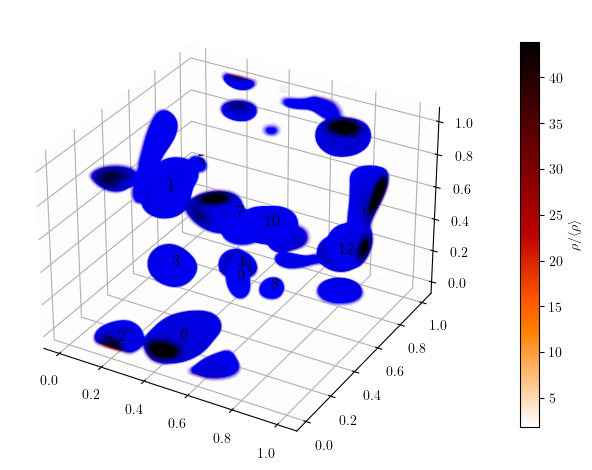

In [18]:
labels = get_labels(oscillons)
coms = get_oscillon_coms(Edens_Rel, data.domain_width_pr, oscillons, labels)[1]
coms = np.array(coms)%data.domain_width_pr

xyz = [np.linspace(0,width,dim) for width,dim in zip(data.domain_width_pr,data.domain_dimensions)]
XYZ = np.meshgrid(*xyz,indexing='ij')

where = oscillons>-1

fig, ax = plt.subplots(figsize=(6.3,8),tight_layout=True,subplot_kw={'projection': '3d'})

scatter = ax.scatter(*(X[where] for X in XYZ), c=Edens[where], alpha=get_opacity(Edens_Rel[where])*.2)

ax.scatter(*(X[where] for X in XYZ), c='b', alpha=.002)

fig.colorbar(scatter, pad=.1, shrink=.5, label=fr'$\rho/\langle\rho\rangle$')
annotate_oscillons(ax, labels, coms)
# ax.set_title(fr"All oscillons, timslice={timeslice}, $a=${a}, $\rho/\langle\rho\rangle>${n_means}")

ax.xaxis.set_pane_color((.95, .95, .95, .1))
ax.yaxis.set_pane_color((.95, .95, .95, .1))
ax.zaxis.set_pane_color((.95, .95, .95, .1))
# ax.set_box_aspect(None, zoom=.75)
# ax.set_xlabel(r"$x$ (pr)",labelpad=-5)
# ax.set_ylabel(r"$y$ (pr)",labelpad=-5)
# ax.set_zlabel(r"$z$ (pr)",labelpad=-5)
# ax.set_xlim(-data.domain_width_pr[0]*.05,data.domain_width_pr[0]*1.05)
# ax.set_ylim(-data.domain_width_pr[1]*.05,data.domain_width_pr[1]*1.05)
# ax.set_zlim(-data.domain_width_pr[2]*.05,data.domain_width_pr[2]*1.05)
# ax.set_title(fr"$\rho/\langle\rho\rangle>$ {n_means}, $a=$ {data.a[timeslices][idx]}",y=1.05)
# ax.tick_params(axis='both', which='major', pad=-3)

plt.show()

In [73]:
data.domain_width_pr

array([1.011473, 1.011473, 1.011473])

In [74]:
coms[2]%data.domain_width_pr

array([0.21189513, 0.03195209, 0.01875606])

In [75]:
where = oscillons>-1

In [13]:
where.sum()

816445